# 建立共現性矩陣(姓名VS犯罪事件)，畫出熱點圖
### 依照危險等級分類犯罪事件，共分成三類，分別建立共現性矩陣

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def find_name(word,num):  
    """
    word: 犯罪行為
    num: 最低人名字數限制
    讀取txt檔中所有人名後，刪除重複、字數不夠的人名，以list輸出。
    """
    f = open("PER/"+ word + '.txt' , encoding = 'utf_16')
    data = f.readlines()
    string = " ".join(data)
    
    #clean text
    string = string.replace('[]','')
    remover=list(" ▼★1234567890【】!@#$%^&*()_+=-[`~'\"|/\\abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZＡＢＣＤＥＦＧＨＩＪＫＬＭＮＯＰＱＲＳＴＵＶＷＸＹＺ〕〔.;{}\r\xa0\u3000、，。「」！？；：<>:\n（）")
    for r in remover:
        string = string.replace(r, "")
    string = string.replace(']',',') 
    
    namelist = string.split(",") #change to list
    namelist = list(filter(lambda x: len(x)>=num, namelist)) #keep larger than two words
    namelist2 = list(set(namelist)) #remove duplicates
    namelist2.sort(key=namelist.index) #keep the order
    return(namelist2)

#建立人名VS犯罪行為字典，並建立稀疏矩陣TDM
def TDM_making(word):
    dic = {}
    for w in word:
        dic[w] = find_name(w,3) #先選定3個字以上的
    df = pd.DataFrame(columns = ["name"])
    for i in word:
        dff = pd.DataFrame({"name": dic[i], i: 1})
        #print(dff)
        df = pd.merge(df, dff, on = 'name', how='outer')
    df = df.fillna(0) #replace NA with 0
    matrix = df.set_index(['name'])
    return matrix

#TDM轉Co-Occurrence Matrix
def TDM_to_CoMatrix(matrix):
    cooccurrence_matrix = np.dot(matrix.transpose(),matrix)
    cooccurrence_matrix_diagonal = np.diagonal(cooccurrence_matrix)
    with np.errstate(divide='ignore', invalid='ignore'):
        cooccurrence_matrix_percentage = np.nan_to_num(np.true_divide(cooccurrence_matrix, cooccurrence_matrix_diagonal[:, None]))
    #print('\ncooccurrence_matrix_percentage:\n{0}'.format(cooccurrence_matrix_percentage))
    cooccurrence = pd.DataFrame(cooccurrence_matrix_percentage,columns = matrix.columns.values.tolist(), index = matrix.columns.values.tolist())
    return(cooccurrence)

In [24]:
#全部事件
word = ["人口販運","性剝削、兒童","偽造貨幣","殺人、重傷害","搶奪",
"勒贖","海盜","恐怖主義、資恐","非法販賣武器","贓物","竊盜","綁架、拘禁等妨害自由",
"環保犯罪","偽造文書","仿冒、盜版、侵害營業秘密","毒品販運","詐欺",
"走私","稅務犯罪","組織犯罪","證券犯罪","貪汙賄賂","第三方洗錢"]

#低風險事件
LowRisk = ["人口販運","性剝削、兒童","偽造貨幣","殺人、重傷害","搶奪",
"勒贖","海盜","恐怖主義、資恐"]
#中風險
MiddleRisk = ["非法販賣武器","贓物","竊盜","綁架、拘禁等妨害自由",
"環保犯罪","偽造文書"]
#高風險
HighRisk = ["仿冒、盜版、侵害營業秘密", "毒品販運","詐欺",
"走私","稅務犯罪","組織犯罪","證券犯罪","貪汙賄賂","第三方洗錢"]

### 讀取文件檔中的姓名，建立姓名對應犯罪事件的字典後，製作稀疏矩陣 

In [25]:
Matrix = TDM_making(word)
print("全部事件稀疏矩陣")
Matrix.head()

全部事件稀疏矩陣


,人口販運,性剝削、兒童,偽造貨幣,殺人、重傷害,搶奪,勒贖,海盜,恐怖主義、資恐,非法販賣武器,贓物,...,偽造文書,仿冒、盜版、侵害營業秘密,毒品販運,詐欺,走私,稅務犯罪,組織犯罪,證券犯罪,貪汙賄賂,第三方洗錢
name,,,,,,,,,,,,,,,,,,,,,
蒋宜婷,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
李雪莉,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
巨洋仲介,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
林丽珍,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
张文馨,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
LowMatrix = TDM_making(LowRisk)
print("低風險稀疏矩陣")
LowMatrix.head()

低風險稀疏矩陣


,人口販運,性剝削、兒童,偽造貨幣,殺人、重傷害,搶奪,勒贖,海盜,恐怖主義、資恐
name,,,,,,,,
蒋宜婷,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
李雪莉,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
巨洋仲介,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
林丽珍,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
张文馨,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [27]:
MidMatrix = TDM_making(MiddleRisk)
print("中風險稀疏矩陣")
MidMatrix.head()

中風險稀疏矩陣


,非法販賣武器,贓物,竊盜,綁架、拘禁等妨害自由,環保犯罪,偽造文書
name,,,,,,
桑波里,1.0,0.0,0.0,0.0,0.0,0.0
寇博加,1.0,0.0,0.0,0.0,0.0,0.0
希特勒,1.0,0.0,0.0,0.0,0.0,0.0
桑柏立,1.0,0.0,0.0,0.0,0.0,0.0
勒希特勒,1.0,0.0,0.0,0.0,0.0,0.0


In [28]:
HiMatrix = TDM_making(HighRisk)
print("高風險稀疏矩陣")
HiMatrix.head()

高風險稀疏矩陣


,仿冒、盜版、侵害營業秘密,毒品販運,詐欺,走私,稅務犯罪,組織犯罪,證券犯罪,貪汙賄賂,第三方洗錢
name,,,,,,,,,
诺瓦纳,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
许玮宁,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
李心洁,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
黄晓明,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
孙芸芸,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 稀疏矩陣轉共現性矩陣

In [29]:
print("全部事件共現性矩陣")
CoMatrix = TDM_to_CoMatrix(Matrix)
CoMatrix.head()

全部事件共現性矩陣


,人口販運,性剝削、兒童,偽造貨幣,殺人、重傷害,搶奪,勒贖,海盜,恐怖主義、資恐,非法販賣武器,贓物,...,偽造文書,仿冒、盜版、侵害營業秘密,毒品販運,詐欺,走私,稅務犯罪,組織犯罪,證券犯罪,貪汙賄賂,第三方洗錢
人口販運,1.000000,0.103933,0.073034,0.117978,0.070225,0.098315,0.039326,0.073034,0.064607,0.089888,...,0.087079,0.002809,0.182584,0.092697,0.064607,0.070225,0.103933,0.061798,0.058989,0.067416
性剝削、兒童,0.094629,1.000000,0.104859,0.115090,0.102302,0.086957,0.017903,0.043478,0.040921,0.097187,...,0.115090,0.002558,0.092072,0.115090,0.061381,0.061381,0.107417,0.071611,0.086957,0.043478
偽造貨幣,0.054622,0.086134,1.000000,0.121849,0.096639,0.102941,0.018908,0.018908,0.037815,0.096639,...,0.086134,0.000000,0.094538,0.107143,0.060924,0.048319,0.088235,0.071429,0.058824,0.046218
殺人、重傷害,0.056150,0.060160,0.077540,1.000000,0.069519,0.078877,0.008021,0.024064,0.014706,0.073529,...,0.082888,0.004011,0.076203,0.077540,0.049465,0.045455,0.070856,0.053476,0.049465,0.045455
搶奪,0.052083,0.083333,0.095833,0.108333,1.000000,0.104167,0.008333,0.016667,0.016667,0.095833,...,0.083333,0.002083,0.095833,0.112500,0.054167,0.035417,0.091667,0.045833,0.054167,0.033333


In [30]:
print("低風險共現性矩陣")
CoLowMatrix = TDM_to_CoMatrix(LowMatrix)
CoLowMatrix

低風險共現性矩陣


,人口販運,性剝削、兒童,偽造貨幣,殺人、重傷害,搶奪,勒贖,海盜,恐怖主義、資恐
人口販運,1.000000,0.103933,0.073034,0.117978,0.070225,0.098315,0.039326,0.073034
性剝削、兒童,0.094629,1.000000,0.104859,0.115090,0.102302,0.086957,0.017903,0.043478
偽造貨幣,0.054622,0.086134,1.000000,0.121849,0.096639,0.102941,0.018908,0.018908
殺人、重傷害,0.056150,0.060160,0.077540,1.000000,0.069519,0.078877,0.008021,0.024064
搶奪,0.052083,0.083333,0.095833,0.108333,1.000000,0.104167,0.008333,0.016667
勒贖,0.046235,0.044914,0.064729,0.077939,0.066050,1.000000,0.017173,0.014531
海盜,0.029536,0.014768,0.018987,0.012658,0.008439,0.027426,1.000000,0.035865
恐怖主義、資恐,0.060185,0.039352,0.020833,0.041667,0.018519,0.025463,0.039352,1.000000


In [31]:
print("中風險共現性矩陣")
CoMidMatrix = TDM_to_CoMatrix(MidMatrix)
CoMidMatrix

中風險共現性矩陣


,非法販賣武器,贓物,竊盜,綁架、拘禁等妨害自由,環保犯罪,偽造文書
非法販賣武器,1.000000,0.052147,0.039877,0.009202,0.036810,0.052147
贓物,0.030741,1.000000,0.113924,0.030741,0.057866,0.075949
竊盜,0.026157,0.126761,1.000000,0.028169,0.052314,0.076459
綁架、拘禁等妨害自由,0.012448,0.070539,0.058091,1.000000,0.049793,0.058091
環保犯罪,0.026667,0.071111,0.057778,0.026667,1.000000,0.068889
偽造文書,0.025954,0.064122,0.058015,0.021374,0.047328,1.000000


In [32]:
print("高風險共現性矩陣")
CoHiMatrix = TDM_to_CoMatrix(HiMatrix)
CoHiMatrix

高風險共現性矩陣


,仿冒、盜版、侵害營業秘密,毒品販運,詐欺,走私,稅務犯罪,組織犯罪,證券犯罪,貪汙賄賂,第三方洗錢
仿冒、盜版、侵害營業秘密,1.000000,0.400000,0.200000,0.133333,0.266667,0.266667,0.333333,0.200000,0.266667
毒品販運,0.007926,1.000000,0.076618,0.120211,0.062087,0.099075,0.058124,0.052840,0.052840
詐欺,0.004594,0.088821,1.000000,0.067381,0.056662,0.143951,0.070444,0.070444,0.053599
走私,0.004651,0.211628,0.102326,1.000000,0.058140,0.090698,0.062791,0.072093,0.044186
稅務犯罪,0.006536,0.076797,0.060458,0.040850,1.000000,0.065359,0.099673,0.071895,0.086601
組織犯罪,0.007313,0.137112,0.171846,0.071298,0.073126,1.000000,0.076782,0.067642,0.073126
證券犯罪,0.007886,0.069401,0.072555,0.042587,0.096215,0.066246,1.000000,0.069401,0.072555
貪汙賄賂,0.003202,0.042689,0.049093,0.033084,0.046958,0.039488,0.046958,1.000000,0.038420
第三方洗錢,0.012085,0.120846,0.105740,0.057402,0.160121,0.120846,0.138973,0.108761,1.000000


### 畫熱點圖
original code: https://stackoverflow.com/questions/20574257/constructing-a-co-occurrence-matrix-in-python-pandas

In [33]:
def show_values(pc, fmt="%.2f", **kw):
    '''
    Heatmap with text in each cell with matplotlib's pyplot
    Source: http://stackoverflow.com/a/25074150/395857 
    By HYRY
    '''
    #from itertools import izip
    pc.update_scalarmappable()
    ax = pc.get_axes()
    for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)

def cm2inch(*tupl):
    '''
    Specify figure size in centimeter in matplotlib
    Source: http://stackoverflow.com/a/22787457/395857
    By gns-ank
    '''
    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels):
    '''
    Inspired by:
    - http://stackoverflow.com/a/16124677/395857 
    - http://stackoverflow.com/a/25074150/395857
    '''

    # Plot it out
    fig, ax = plt.subplots()    
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap='RdBu', vmin=0.0, vmax=1.0)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)      

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    #show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    ax.invert_yaxis()
    ax.xaxis.tick_top()

    # resize 
    fig = plt.gcf()
    fig.set_size_inches(cm2inch(70, 30))
    
def draw_heatmap(matrix):
    x_axis_size = matrix.shape[0]
    y_axis_size = matrix.shape[1]
    title = "Co-occurrence matrix\n"
    xlabel= ''#"Labels"
    ylabel= ''#"Labels"
    xticklabels = matrix.columns.values.tolist()
    yticklabels = matrix.columns.values.tolist()
    heatmap(matrix, title, xlabel, ylabel, xticklabels, yticklabels)
    #plt.savefig('image_output.png', dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures
    plt.show()

全部事件熱點圖


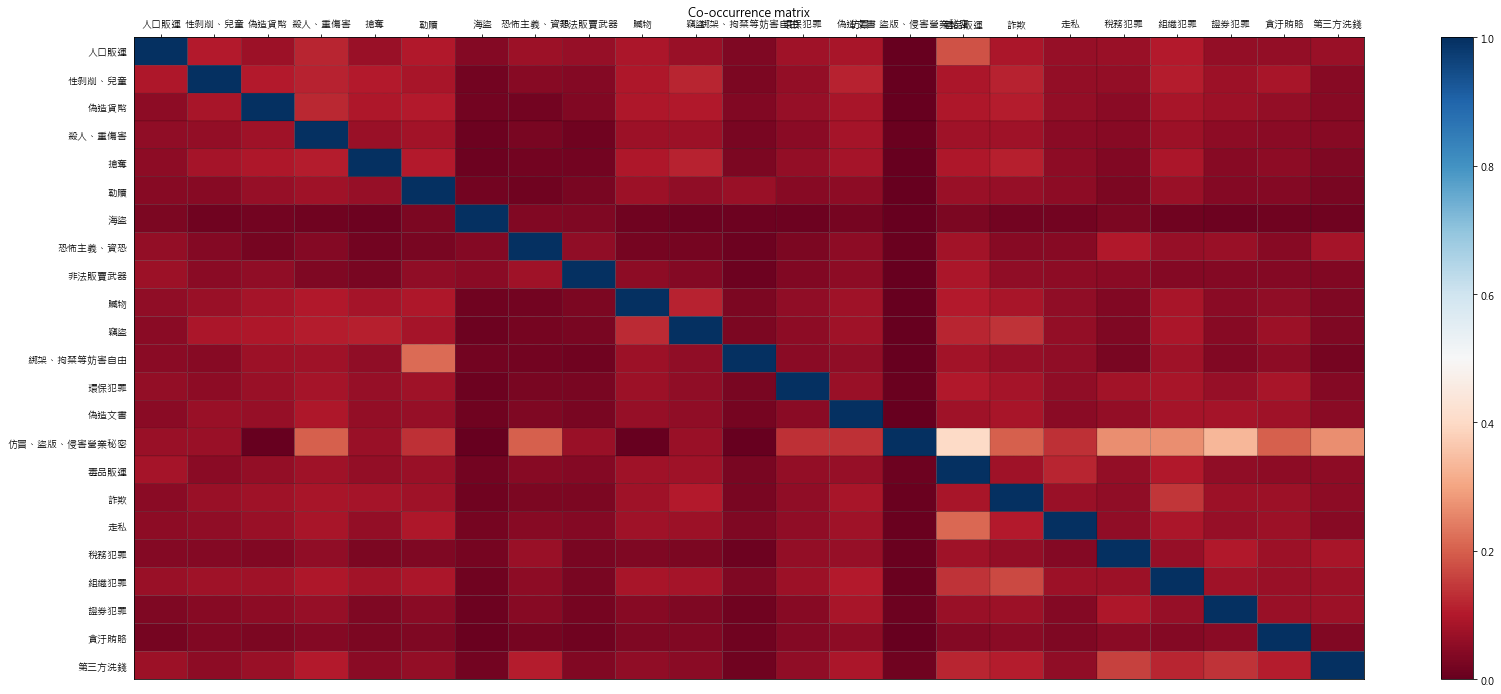

In [34]:
print("全部事件熱點圖")
draw_heatmap(CoMatrix)

低風險熱點圖


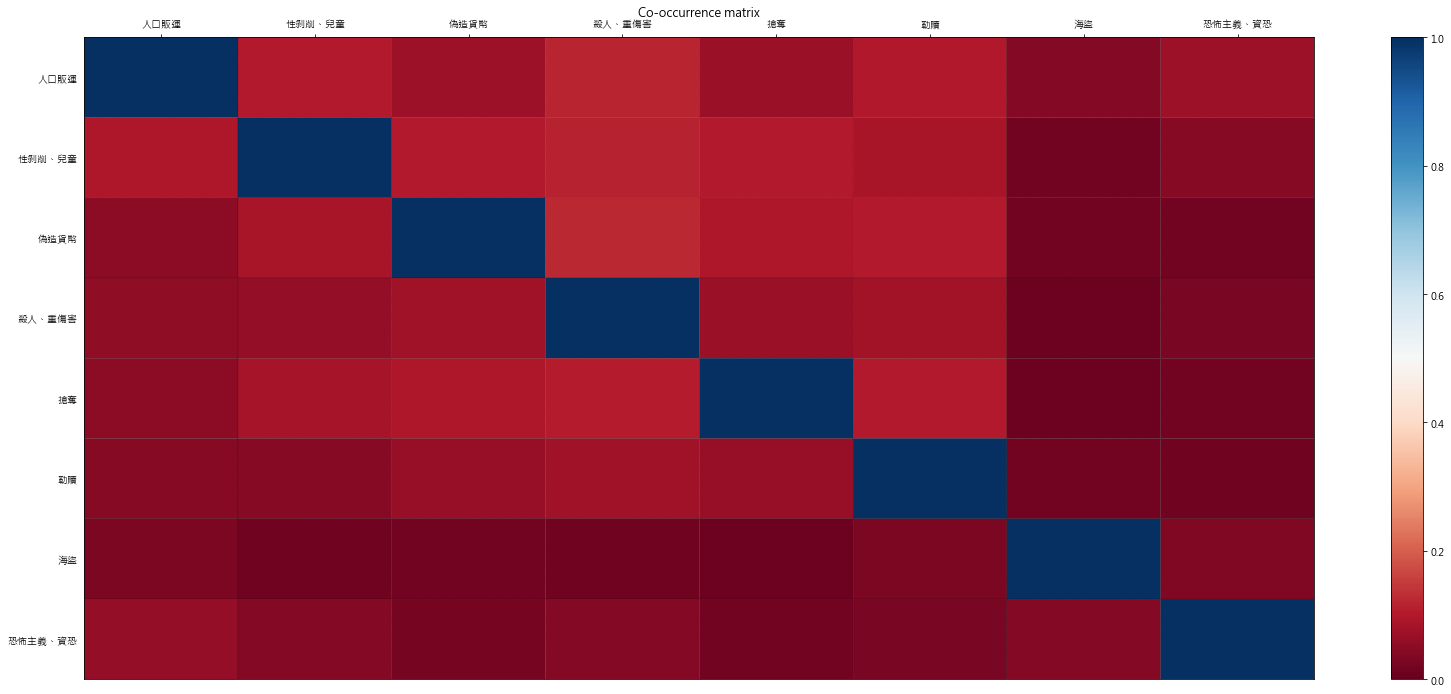

In [35]:
print("低風險熱點圖")
draw_heatmap(CoLowMatrix)

中風險熱點圖


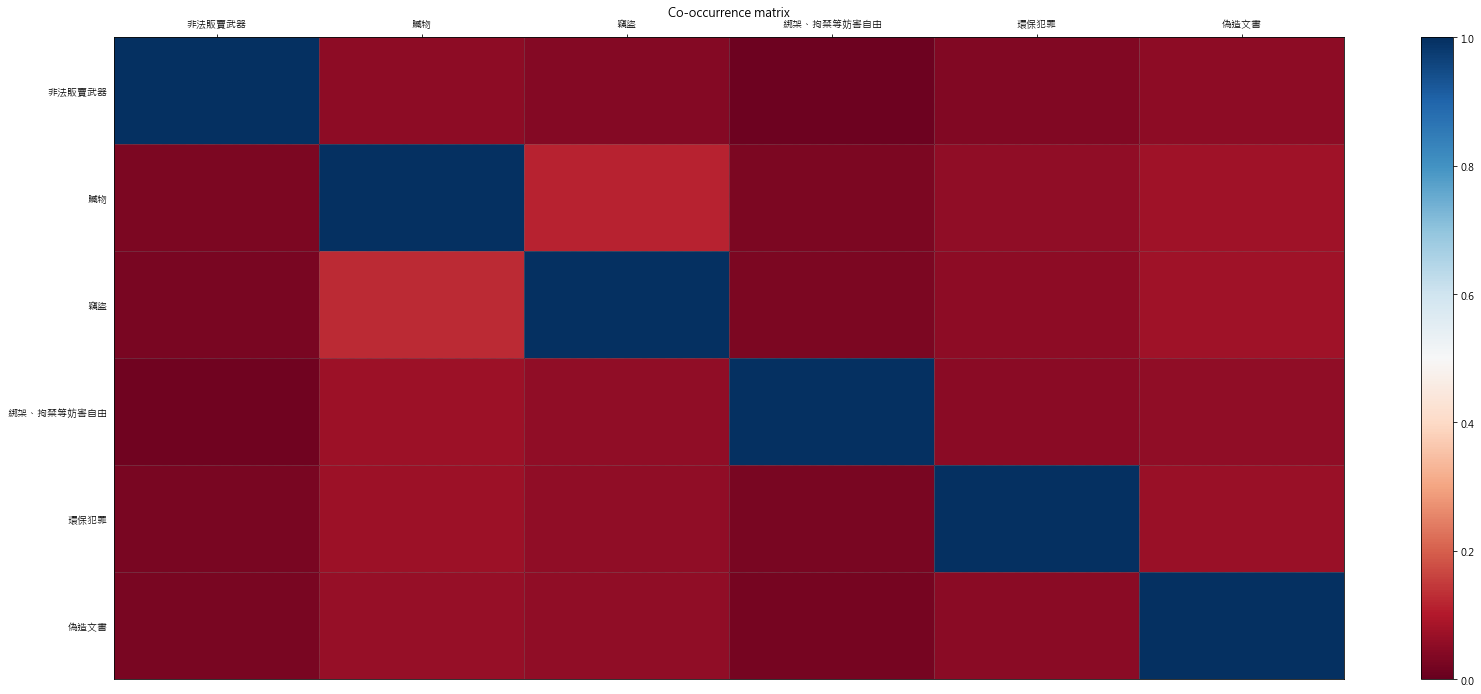

In [36]:
print("中風險熱點圖")
draw_heatmap(CoMidMatrix)

高風險熱點圖


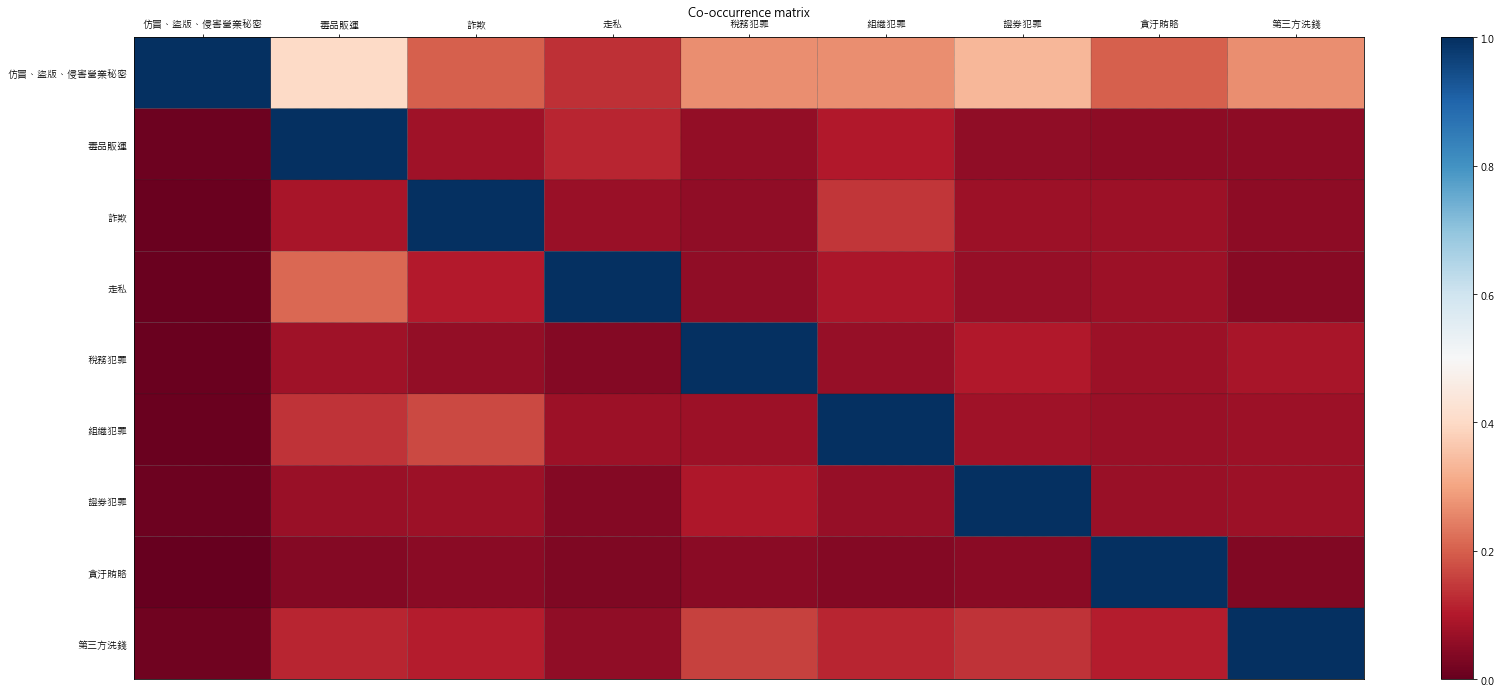

In [37]:
print("高風險熱點圖")
draw_heatmap(CoHiMatrix)